# Introduction to PyMC3 - Overview

Statistics is the study of uncertainty. Hi! I am In Son Zeng. In this lecture, I will show you how you can
quantify uncertainty using the Bayesian way. For example, if you want to know the probability that a certain
football player will make a field goal. Under the Bayesian framework, both the prior knowledge that you have
about the player and the observed performance you see are important. We can combine both sources of
knowledge to generate statistics that lead to our understanding that the player will make the field goal.

In [1]:
# First, let's import the pandas and numpy libraries
import pandas as pd
import numpy as np

# In addition, I want to show some plots, so we'll import matplotlib as well
import matplotlib.pyplot as plt

# Finally, we'll bring in the scipy stats libraries
from scipy import stats

In [2]:
# The data for this lecture comes from the footballdb website, let's read it in to a pandas DataFrame
data = pd.read_csv('nfl.csv')
# And let's look at the first few lines
data.head()

,Player,Team,PAT,FG,0-19,20-29,30-39,40-49,50+,Lg,Pts
0,Harrison Butker,KC,0.938,0.895,0/0,9/9,9/10,13/13,3/6,56,147
1,Wil Lutz,NO,0.980,0.889,1/1,9/9,6/6,13/15,3/5,58,144
2,Justin Tucker,BAL,0.966,0.966,0/0,8/8,9/9,10/11,1/1,51,141
3,Zane Gonzalez,ARI,0.971,0.886,0/0,12/12,12/13,5/8,2/2,54,127
4,Matt Gay,TB,0.896,0.771,0/0,6/6,5/7,11/14,5/8,58,124


So, we can see that the data includes the player name, some team identification, their probability of
attaining a field goal under the column FG, and information about how successful the kicker was in achieving
a field goal each time they tried at given distances. For instance, we see that Wil Lutz was the only kicker
here to attempt a field goal within 20 yards, and he was successful, while at 50 or more yards out everyone
has attempted but only a couple have perfectly achieved a field goal.

Let's look at a histogram of the field goal probability.

<Figure size 576x576 with 0 Axes>

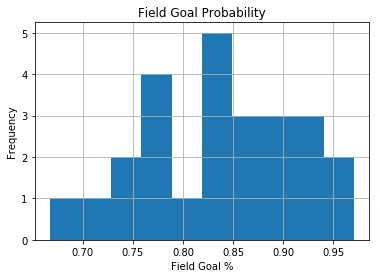

In [5]:
# First let's create a new figure using the figure function of matplotlib
fig = plt.figure(figsize = (8,8))
# You'll notice I decided to set the figure size at 8 inches wide by 8 inches tall

# Now we'll just plot the histogram using the convenience function of pandas, 
# indicating we want column FG to be the one plotted
data.hist(column = "FG")

# Finally, let's set the label for the x and y axes
plt.xlabel("Field Goal %")
plt.ylabel("Frequency")

# And set the title and show the plot
plt.title("Field Goal Probability")
plt.show()

You can see the field goal manifests a roughly binomial distribution, with most observations clustering at 0.8 in probability.

The training consists of two parts. The first part introduces the Bayes' theorem and concepts associated with creating Bayesian models. 

The second part introduces PyMC3, an elegant Python package in implementing Bayesian models. Bye for now!

# Introduction to PyMC3 - Concept

Welcome back! What is Bayesian statistics? What are the reasons to use Bayesian statistics? How to use Bayesian statistics?

In this segment, I will discuss the theories, application and advantages of using Bayesian statistics. 

Bayesian inference is a method of statistical inference in which Bayes’ theorem is used to update the probability for a hypothesis as more evidence or information becomes available. In other words, Bayesian inference is subjective and it quantifies uncertainty with probabilities. 

Similar to most data science paradigm, Bayesian statistics require observing data to create a model. If the observed data follows some distribution, we call the data likelihood. With these two settings, we can update the belief using the Bayes' Theorem.

Bayes' theorem is the underpinning of most modelings within the Bayesian statistics framework. The theorem suggests that the updated belief is proportional to the product of the prior distribution and the likelihood. The updated belief is also called the posterior distribution. 

The posterior is a compromise between the prior and likelihood. Specifically:

When there are less data points, the distribution is skewed towards the prior distribution.

When there are more data points, the distribution is skewed towards the likelihood distribution.

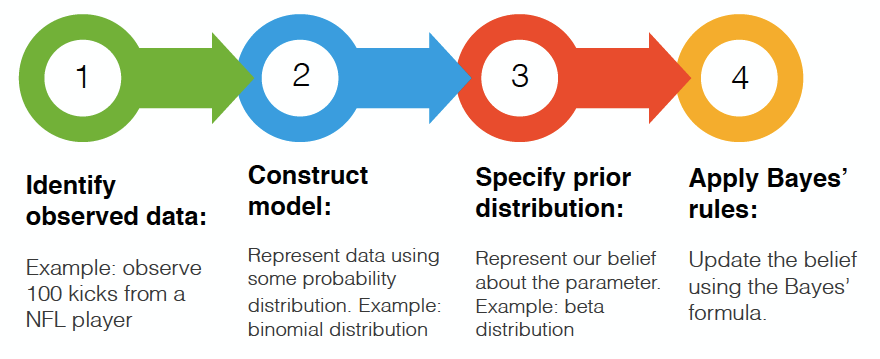

In [8]:
from IPython.display import Image
file_dir = '/Users/son520804/Desktop/Winter_2020/Prof Christopher RA/Bayesian_Model.png'
Image(filename=file_dir)

Now we move on to how to apply Bayesian statistics. To make a Bayesian inference we consider a 4-step model. 

First, identify the observed data.

Second, construct a probabilistic model to represent the data.

Third, specify prior distributions.

Finally, you should apply the Bayes' rules to obtain the posterior distribution. 

The first three steps are intuitive. In the first and second steps, we represent the data we have using some probability distribution.

For the NFL example, suppose we observe 100 kicks from a player, then binomial distribution should be used to record the result for each kick. To set up a prior based on our belief, we can simply take a beta distribution. We skip the maths in this training.

In [6]:
# We can randomly generate binomial distributed samples by 
# setting the sample size as 100 and success probability of making a field goal as 0.8
n = 100
p = 0.8
size = 100
# Next we can set up binom as a random binomial variable that will give us 100 draws of binomial distributions
binom = np.random.binomial(n, p, size)

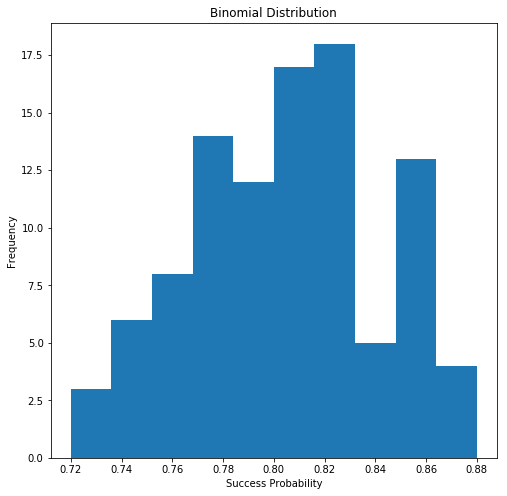

In [7]:
# Now we use plt.hist so you can visualize what's going on here
plt.figure(figsize=(8,8))
plt.hist(binom/n)
# Let's set the x and y axis and the title.
plt.xlabel("Success Probability")
plt.ylabel("Frequency")
plt.title("Binomial Distribution")
# and show the plot
plt.show()

Once again, we can see a histogram of the binomial distribution with mean closed to 0.8

To obtain the posterior distribution under Bayes' rule, however, represents the coolest part of Bayesian analysis since it involves most computation. 

Traditional methods include integrating the random variables and determining the resulting distribution in closed form. However, it is not always the case that posterior distribution is obtainable through integration. Probabilistic programming languages (PPL), on the other hand, can help update the belief iteratively to approximate the posterior distribution even when a model is complex or hierarchical. The NUTS algorithm under Monte Carlo Markov Chain (MCMC) is found to be effective in computing and representing the posterior distribution. 

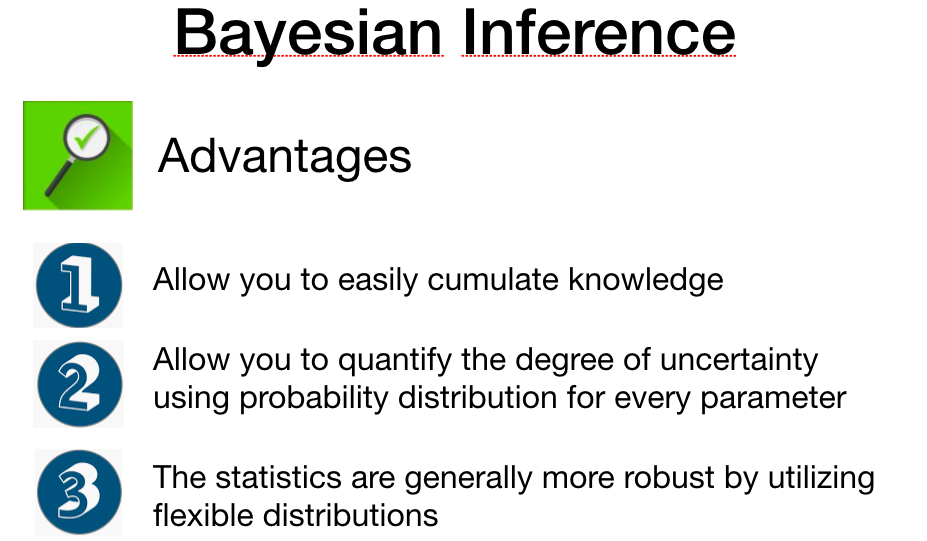

In [18]:
file_dir = '/Users/son520804/Desktop/Winter_2020/Prof Christopher RA/Bayesian_Advantage.png'
Image(filename=file_dir)

A salient advantage of the Bayesian approach lies on its capability of easily cumulating knowledge when you know some prior information before looking at the data.

Another potential of Bayesian statistics is that it allows the parameters, such as the probability of making the field goal, be summarized by probability distributions, regardless of whether it is prior, likelihood, or posterior. With that, the degree of uncertainty is quantified. 

Furthermore, Bayesian approach generates more robust posterior statistics by utilizing flexible distributions in prior and data.

In the next video, we will introduce PyMC3, a Python package to perform MCMC conveniently and obtain easily interpretable Bayesian estimations and plots. Bye for now!

# Introduction to PyMC3 - Worked example
# Worked example: simple Bayesian linear regression

Welcome back! This video mainly demonstrates the use of PyMC3 in Bayesian modeling and visualizing posterior results. What is PyMC3 package? How to specify prior distribution? How to compute posterior distribution? How to interpret the result?

Bayesian modeling involves complex mathematical integrations and sampling processes. PyMC3 is a Python package for probabilistic programming which allows you to write down models using an intuitive syntax to describe a data generating process. Going further, PyMC3 supports the MCMC algorithm for model fitting, which is beautiful because it can handle virtually any statistical model and it is easy to write functional code.

In [9]:
# First, let's import the pymc3 library as pm
import pymc3 as pm

/Users/son520804/anaconda3/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/son520804/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We will introduce Bayesian linear regression in the training example.  

# Worked example: simple Bayesian linear regression

Bayesian linear regression assumes that the parameters specifying the linear model are themselves generated by normal prior distributions. We are interested in predicting outcomes Y as normally-distributed observations with expected value $\mu$ and variance $\sigma^2$.

We also generate the simulated data for mu as a linear combination of intercept alpha, covariates beta_1 times X1 and beta_2 times X2. Here each data point of predictor variables X1 and X2 is an arbitrary uni-dimensional value. 

$$ Y \sim N(\mu, \sigma^2)$$
$$\mu = \alpha + \beta_1X_1 + \beta_2X_2$$

where $\alpha$ is the intercept, and $\beta_1,\beta_2$ are the coefficients for covariate $X_1, X_2$, respectively. Finally, $\sigma$ represents the standard error.

Our goal of using Bayesian linear regression is typically to infer basic statistics, such as mean, median and standard deviation for each parameter.

As the first step of constructing a Bayesian model, we assign a prior distribution for each unknown variable in the model. 

Specifically, we choose the normal prior for intercept, wich mean 0 and standard deviation 3. the square root of 9. We also choose the normal prior for beta_1 and beta_2. Finally, we assign half-normal prior for sigma, which stands for the error term in our model.

$$\alpha \sim N(0,9)$$
$$\beta_1 \sim N(2,9)$$
$$\beta_2 \sim N(2,9)$$
$$\sigma \sim |N(0,1)|$$

In [10]:
## Let us begin in Generate Data
# We can simulate some artificial data from this model using Numpy's random module. 
# We first generate the data that closely correspond the PyMC3 model structure.

# Initialize random number generator seed for reproducible results
seed = 1000
np.random.seed(123)

# We assign the intercept alpha and standard deviation sigma as 1, and assign the regression coefficients
# beta 1 and beta 2 as 1 and 2.5. 
alpha, sigma = 1, 1
beta = [1, 2.5]

# Then we make up the sample size as 100
size = 100

# and randomly generate predictor variables X1 and X2
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.5

#The code specifies that Y is the linear combination of parameters alpha and beta, and two predictor variables, X1 and X2.
# Finally, we set up Y, the simulated outcome variable which is alpha plus beta 0 times X1 
# plus beta1 times X2 plus the array of error term
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size)*sigma

# Remind what that means

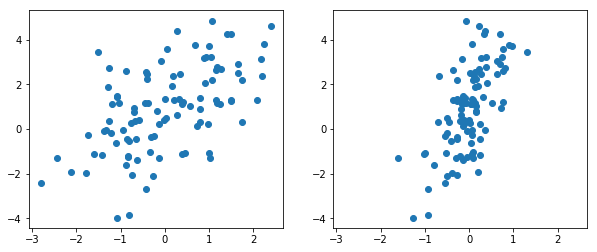

In [11]:
# Let us plot the scatter plots using inline magic
%matplotlib inline
# I am going to make a subplot of scatterplots with X1 and X2 versus Y 
# and set the figure set as 10 times 4
# I will share the x- and y-axis among two subplots by setting sharex equals true
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)

Here is what the simulated data look like. You can predict the x and y values are positively correlated. We also see that slope of X2 and Y looks steeper.

## Model Specification

In PyMC3, the syntax of specifying the model is approximately the same as the statistical notation. 

Our initial beliefs about the parameters are defined using Normal and HalfNormal distribution.

See https://docs.pymc.io/api/distributions/continuous.html for a glossary of probability distribution.

### MCMC approach using PymC3

In [13]:
# PyMC3 comes in when we specify our model and run the sampling process. 
# It is useful to first specify the model formally using generative process notation. 

# We start with creating an instance model with an empty pm.Model function
model = pm.Model()

# Now let us specify the model. The with model statement wraps up every prior and likelihood
with model:
    
    # Our model assumes that each observation y is sampled from a normal distribution with a mean mu 
    # with a normally distributed prior and standard deviation sigma with a half-normal prior.
    
    # Let us construct priors one by one.
    # We assign normal prior to the intercept with mean 0 and standard deviation 3,
    # then assign normal prior to beta1 and beta2 as regression coefficients and let the shape equals to 2
    # For standard deviation sigma, we are going to use pm.Halfnormal to assign half normal prior.
    alpha = pm.Normal('alpha', mu=0, sigma=3)
    beta = pm.Normal('beta', mu=2, sigma=3, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # The model also requires a specification of the expected value of outcome mu
    # I am going to directly define mu equals to the intercept alpha plus beta0 times X1 plus beta1 times X2
    # It works perfectly since X1 and X2 appear in the last chunk
    mu = alpha + beta[0]*X1 + beta[1]*X2
    
    # To complete the model, the likelihood function for the data must be defined. 
    # The observed argument explicitly flags the random variable y_obs as one that is not a latent variable, 
    # but instead is given by the data.
    # We take Y as the input data and assign a normal prior corresponding to the model specification 
    y_obs = pm.Normal('y_obs', mu = mu, observed = Y)

In [14]:
# To initiate the sampling process, we use the pm.sample function. 
# This function should be placed within the context of our model.
with model:
    # In pm.sample function, it is useful to specify the number of draws and the number of chains 
    # that we want the sampler to run.
    # We set the sampler to take 500 draws and take 2 chains
    # We also provide a seed to the random_seed generator to make the results reproducible. 
    # Now we start the sampler
    trace = pm.sample(draws = 500, chains = 2, random_seed = seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 2000/2000 [02:14<00:00, 14.83draws/s]


It may take several minutes for PyMC3 to run the MCMC model. As you can see, after sampling, the resulting set of MCMC chains are returned as a single PyMC3 trace object, which contains the sampled values for every iteration in every chain for posterior analysis.

To analyze the results, one of the primary checks of sampling adequacy is a visual analysis of the trace plots and corresponding posterior estimates.

## Posterior Diagnostics

PyMC3 provides a comprehensive library of built-in functions to diagnose and analyze the resulting set of MCMC samples. Those include, but not limited to, traceplot, summary table, Gelman-Rubin statistics, and posterior predictive checks. Let us run the following codes and get a sense of the simulation.

### Traceplot

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


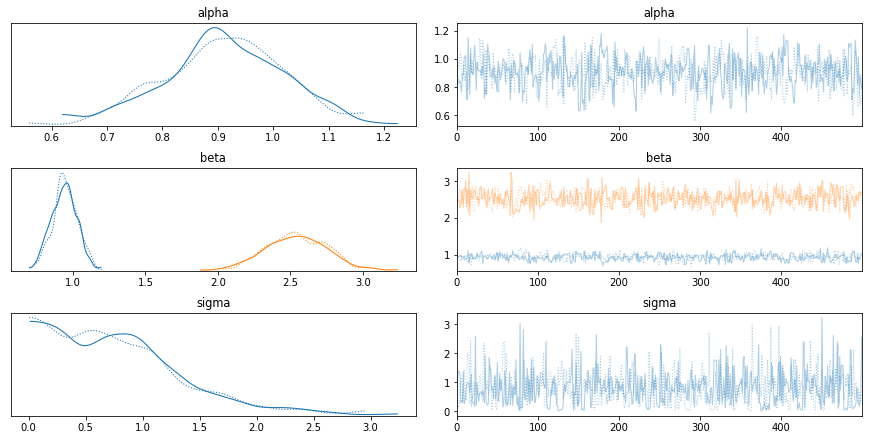

In [15]:
# First, we can make simple posterior plots by creating a traceplot.

# The pm.traceplot function takes the trace object, you can add an optional arguments
# such as varnames to specify alpha, beta and sigma, the random variables you want to include in the plot.
# If you want to see the differences between the plots, you can also add a dictionary 
# of lines to overlay the simulated values on the plots.

pm.traceplot(trace,
            varnames = ['alpha', 'beta', 'sigma'])
plt.show()

The left column of plots shows the estimated posterior distribution for each specified variables. From the histograms, you can see that alpha, beta1 and beta2 follows approximately normal distribution, while sigma value demonstrates a decreasing trend in probability. Overall, the histograms in traceplot provides us a better understanding about the posterior distribution. 

The right column of plots shows the path of the corresponding chains for each parameter. Since the chains maintain flat trajectories, it indicates good convergence of the MCMC.

### Summary Table

In [16]:
# We also want to use pm.summary to obtain a text-based summary statistics for posterior distributions
# We round the results into 2 digits
pm.summary(trace).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.91,0.11,0.70,1.11,0.00,0.00,537.0,537.0,529.0,418.0,1.0
beta[0],0.94,0.09,0.80,1.13,0.00,0.00,517.0,517.0,519.0,694.0,1.0
beta[1],2.54,0.21,2.16,2.89,0.01,0.01,671.0,671.0,665.0,466.0,1.0
sigma,0.80,0.58,0.00,1.80,0.02,0.02,799.0,799.0,542.0,395.0,1.0


The summary provides common posterior statistics such as posterior mean, posterior standard deviation, highest posterior density, Markov Chain Standard Error statistic, effective sample size for the four parameters. The format of the summary table is pandas.DataFrame.

See: https://docs.pymc.io/api/stats.html

For example, we see that the posterior mean of alpha is 0.91, with posterior standard deviation 0.11. We also infer that under 95% credible interval, the posterior distribution falls between 0.70 and 1.11. Finally, ess_mean is an evaluation metric for convergence; you can see The result mostly confirms the distribution observed in the simulation. 

Effective sample size: https://mc-stan.org/docs/2_18/reference-manual/effective-sample-size-section.html

### Gelman-Rubin Convergence Criterion

We also look at the Gelman-Rubin statistics which represent the ratio of the pooled variance of values across all chains to the average variance of each chain. It is scaled so that 1 represents perfect convergence. Theoretically, if the Gelman-Rubin statistic is less than 1.1, the chains are decently converged (Kang, 2018). 

You can find the Gelman-Rubin statistics at "Data variables" part.

In [17]:
# We can use pm.gelman_rubin function to obtain Gelman-Rubin statistics to check whether 
# the posterior distribution converges.
print(pm.gelman_rubin(trace,
                     varnames=['alpha', 'beta', 'sigma']))

/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:43: UserWarning: gelman_rubin has been deprecated. In the future, use rhat instead.
  warnings.warn("gelman_rubin has been deprecated. In the future, use rhat instead.")
/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


<xarray.Dataset>
Dimensions:     (beta_dim_0: 2)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1
Data variables:
    alpha       float64 1.001
    beta        (beta_dim_0) float64 1.0 1.003
    sigma       float64 1.003


Here all the Gelman-Rubin statistics are approximately 1, indicating that all chains are converged.

Now you have learned the PyMC3 package to iteratively cumulate knowledge using Bayesian methods. Good luck with the rest of the study!

Reference:
    1. http://www-personal.umd.umich.edu/~wiclarks/ASTRGroup/StatsSeminars/FlatWebpages/02_ProbabilityDistributions.html
    2. https://docs.pymc.io/notebooks/getting_started.html